# 6.6.1 Analyzing Time Series Data

## Contents List:

1) Import Data and Libraries
2) Line Charts
3) Decomposition
4) Testing for Stationarity
5) Stationarizing
6) Forecasting

## 1) Import Data and Libraries

Install quandl

`conda install quandl`

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

# Disable deprecation warning
warnings.filterwarnings("ignore")

# Styling option
plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'sH5fBon3dFUKSkcsvTbC'

In [3]:
# Ensures graphs are displayed in notebook without the need to call

%matplotlib inline

In [4]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [5]:
# Import original data set "dairy_wrangled.csv"
data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

In [6]:
data.shape

(4325, 23)

In [7]:
data.head()

Unnamed: 0       Location  Total Land Area (acres)  Number of Cows  \
0           0      Telangana                   310.84              96   
1           1  Uttar Pradesh                    19.19              44   
2           2     Tamil Nadu                   581.69              24   
3           3      Telangana                   908.00              89   
4           4    Maharashtra                   861.95              21   

  Farm Size      Date Product Name                 Brand  \
0    Medium   2/17/22    Ice Cream           Dodla Dairy   
1     Large   12/1/21         Milk                  Amul   
2    Medium   2/28/22       Yogurt           Dodla Dairy   
3     Small    6/9/19       Cheese  Britannia Industries   
4    Medium  12/14/20   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...         12/27/21   
1                687.48           42.61  ...          10/3/21   
2                503.48           36.50  ...          1/14/22   
3                823.36           26.52  ...          5/15/19   
4                147.77           83.85  ...         10/17/20   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0          1/21/22                         7                 82.24   
1         10/25/21                       558                 39.24   
2          2/13/22                       256                 33.81   
3          7/26/19                       601                 28.92   
4         10/28/20                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

In [8]:
# Drop column 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data.shape

(4325, 22)

## 2) Line Charts

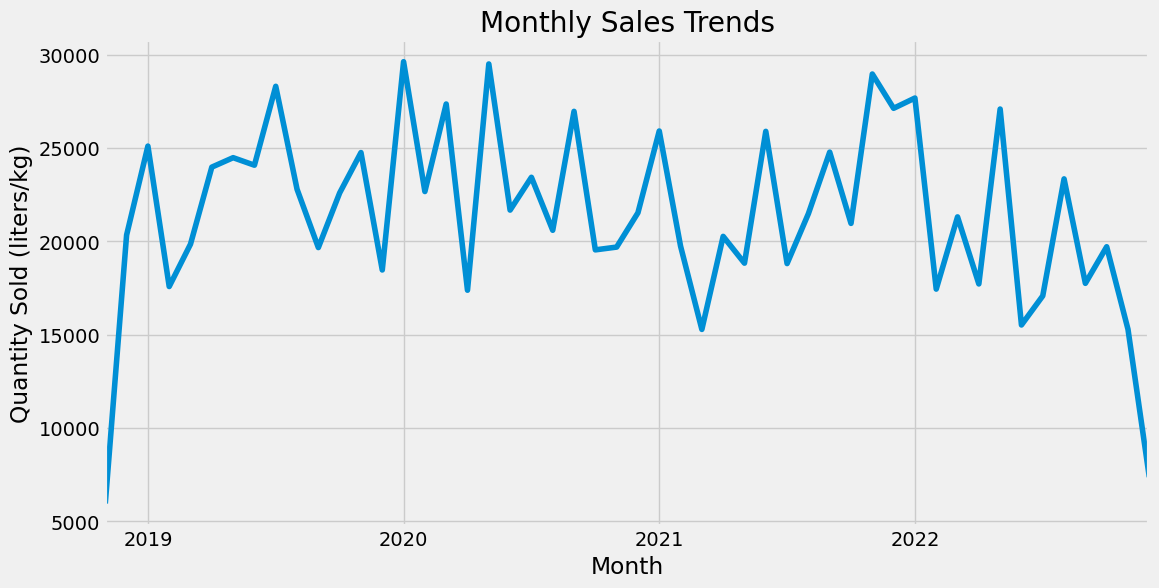

In [10]:
# Sales trends over time
data['Production Date'] = pd.to_datetime(data['Production Date'])
sales_trends = data.groupby(data['Production Date'].dt.to_period('M'))['Quantity Sold (liters/kg)'].sum()
sales_trends.plot(figsize=(12, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (liters/kg)')
plt.show()

Graph appears stationary besides dates at the end

In [11]:
data_sub = data.loc[(data['Production Date'] >= '2019-01-01') & (data['Production Date'] < '2022-12-01')]

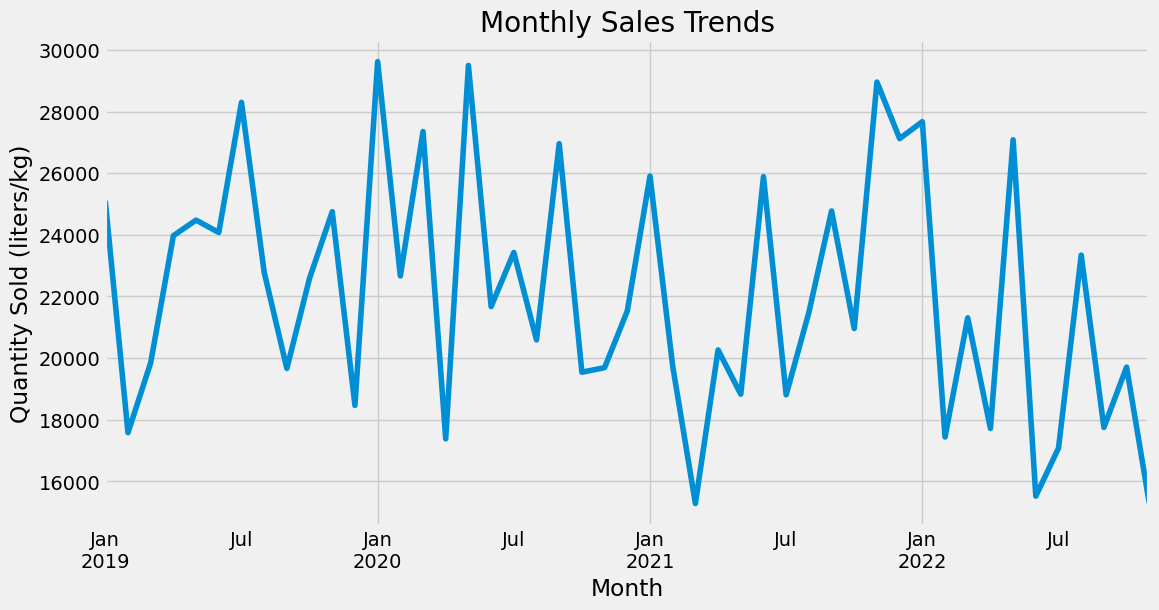

In [12]:
# Sales trends over time
data_sub['Production Date'] = pd.to_datetime(data_sub['Production Date'])
sales_trends = data_sub.groupby(data_sub['Production Date'].dt.to_period('M'))['Quantity Sold (liters/kg)'].sum()
sales_trends.plot(figsize=(12, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (liters/kg)')
plt.show()

Removing first couple of months/days (11/2018 and 12/2018) and the last month/days (12/22) seems to have "corrected" the graph from having very low quantities. This could be caused by a slow roll out of the tracking, meaning all the farms and products weren't entered until early January, and at the end of the tracking period a similar slow removal of products or brands. The Kaggle page said there was data drift- perhaps this is it?

In [13]:
df = pd.DataFrame(data)

# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Define the date range for filtering
start_date = '2018-11-13'
end_date = '2022-12-22'

# Filter the DataFrame based on the date range
data_sub1 = df.loc[(df['Production Date'] >= '2019-01-01') & (df['Production Date'] < '2022-12-01')]

## 3) Decomposition

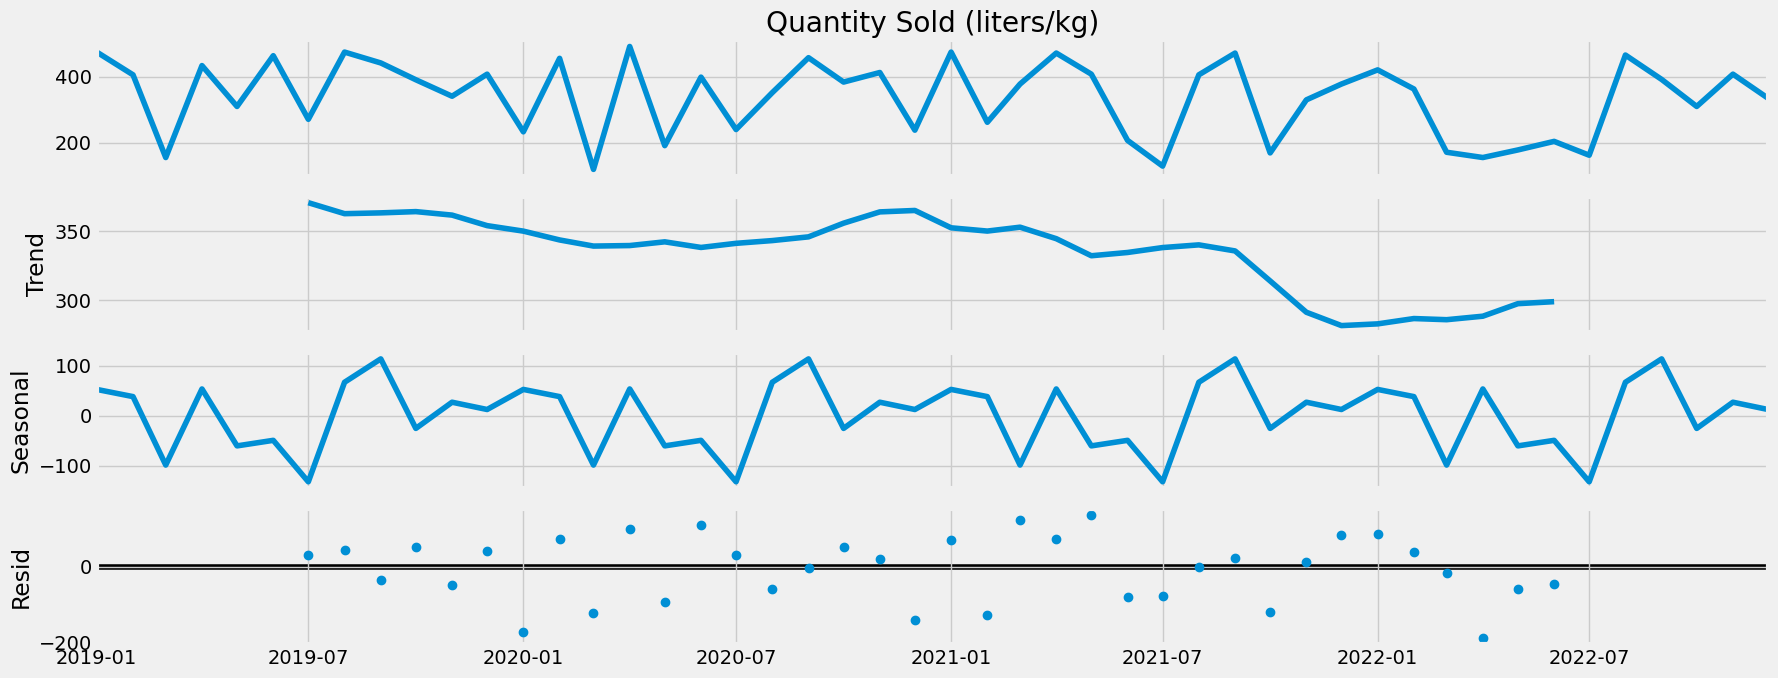

In [14]:
from pylab import rcParams

# Create a sample DataFrame with monthly data for 2 years
dates = pd.date_range(start='2019-01-01', end='2022-12-01', freq='MS')
data = {
    'Production Date': dates,
    'Quantity Sold (liters/kg)': np.random.randint(100, 500, size=len(dates))
}

df = pd.DataFrame(data)

# Convert 'Production Date' to datetime and set as index
df['Production Date'] = pd.to_datetime(df['Production Date'])
df.set_index('Production Date', inplace=True)

# Ensure the index has a frequency
df.index.freq = 'MS'

# Extract the time series data
data_sub1 = df['Quantity Sold (liters/kg)']

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub1, model='additive')

# This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

- Level: includes all components like the linechart above first row is called “level” and includes all components
- Trend: is the same as level if the data was smoothed. There appears to be a slight downwards trend.
- Seasonality: seasonal fluctuations represented by a spikey curve that changes at a regular interval. If you didn’t have any seasonality (which is rarely the case), the curve would be flat.
- Residual (aka noise): anything that isn’t included in trend or seasonality. There are quite a few residuals, meaning that the data could be smoothed in futute analysis.

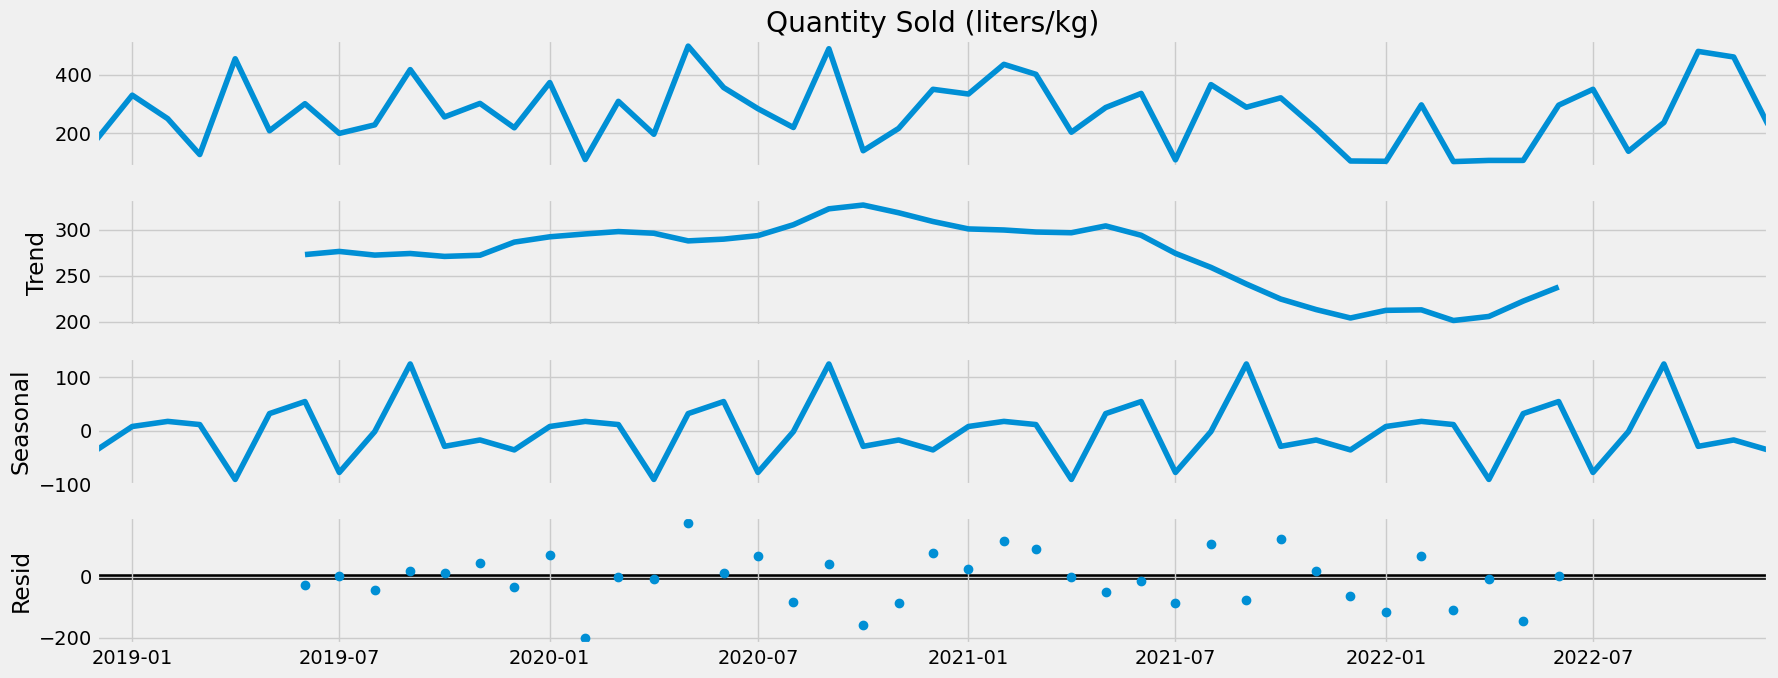

In [15]:
from pylab import rcParams

# Create a consistent length of dates and data
dates1 = pd.date_range(start='2018-11-13', end='2022-12-22', freq='MS')
data1 = {
    'Production Date': dates1,
    'Quantity Sold (liters/kg)': np.random.randint(100, 500, size=len(dates1))
}

df1 = pd.DataFrame(data1)

# Convert 'Production Date' to datetime and set as index
df1['Production Date'] = pd.to_datetime(df1['Production Date'])
df1.set_index('Production Date', inplace=True)

# Ensure the index has a frequency
df1.index.freq = 'MS'

# Extract the time series data
data_sub1 = df1['Quantity Sold (liters/kg)']

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub1, model='additive')

# Plot the decomposition
decomposition.plot()
plt.show()

- Graph is similar to the one above, but has a slightly different trend line. Should the data start on 2019/06 and end at 2022/06 like the trend line suggests?

## Extra: Failed attempts at smoothing?

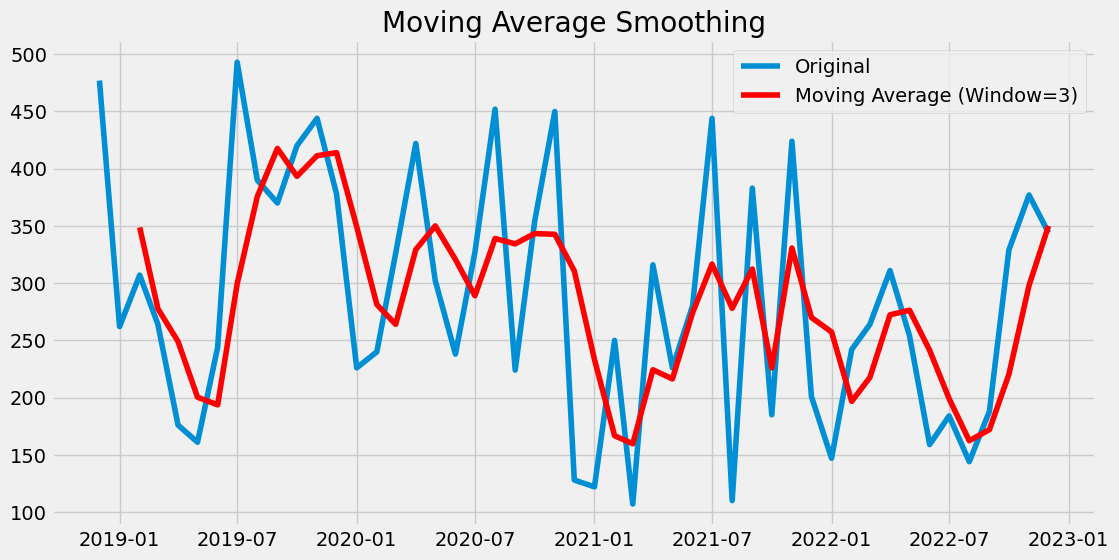

In [16]:
# Create a consistent length of dates and data
dates1 = pd.date_range(start='2018-11-13', end='2022-12-22', freq='MS')
data1 = {
    'Production Date': dates1,
    'Quantity Sold (liters/kg)': np.random.randint(100, 500, size=len(dates1))
}

df1 = pd.DataFrame(data1)

# Convert 'Production Date' to datetime and set as index
df1['Production Date'] = pd.to_datetime(df1['Production Date'])
df1.set_index('Production Date', inplace=True)

# Ensure the index has a frequency
df1.index.freq = 'MS'

# Extract the time series data
data_sub1 = df1['Quantity Sold (liters/kg)']

# Apply moving average smoothing
df1['Moving Average'] = data_sub1.rolling(window=3).mean()

# Plot the original data and the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data_sub1, label='Original')
plt.plot(df1['Moving Average'], label='Moving Average (Window=3)', color='red')
plt.legend()
plt.title('Moving Average Smoothing')
plt.show()

In [17]:
# Create a consistent length of dates and data
dates1 = pd.date_range(start='2018-11-13', end='2022-12-22', freq='MS')
data1 = {
    'Production Date': dates1,
    'Quantity Sold (liters/kg)': np.random.randint(100, 500, size=len(dates1))
}

df1 = pd.DataFrame(data1)

# Convert 'Production Date' to datetime and set as index
df1['Production Date'] = pd.to_datetime(df1['Production Date'])
df1.set_index('Production Date', inplace=True)

# Ensure the index has a frequency
df1.index.freq = 'MS'

In [18]:
# Extract the time series data
data_sub1 = df1['Quantity Sold (liters/kg)']

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub1, model='additive')

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [19]:
# Calculate the moving average of the trend component
window_size = 12  # Example window size of 12 months for annual smoothing
df1['Trend_Moving_Average'] = decomposition.trend.rolling(window=window_size, center=True).mean()

# Plot the original data, trend component, and moving average trend
plt.figure(figsize=(12, 6))
plt.plot(data_sub1, label='Original')
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.plot(df1['Trend_Moving_Average'], label='Trend Moving Average (Window=12)', color='red')
plt.legend()
plt.title('Trend Estimation Using Moving Average')
plt.show()

In [20]:
# Create a consistent length of dates and data
dates1 = pd.date_range(start='2018-11-13', end='2022-12-22', freq='MS')
data1 = {
    'Production Date': dates1,
    'Quantity Sold (liters/kg)': np.random.randint(100, 500, size=len(dates1))
}

df1 = pd.DataFrame(data1)

# Convert 'Production Date' to datetime and set as index
df1['Production Date'] = pd.to_datetime(df1['Production Date'])
df1.set_index('Production Date', inplace=True)

# Ensure the index has a frequency
df1.index.freq = 'MS'

# Extract the time series data
data_sub1 = df1['Quantity Sold (liters/kg)']

# Calculate the trend component using a moving average
window_size = 12  # Example window size of 12 months for annual smoothing
df1['Trend'] = data_sub1.rolling(window=window_size, center=True).mean()

# Detrend the series (remove the trend component)
df1['Detrended'] = data_sub1 - df1['Trend']

# Estimate the seasonal component by averaging the detrended series for each month
df1['Seasonal'] = df1['Detrended'].groupby(df1.index.month).transform('mean')

# Calculate the residual component
df1['Residual'] = df1['Detrended'] - df1['Seasonal']

# Plot the original data, trend component, seasonal component, and residual component
plt.figure(figsize=(12, 15))

plt.subplot(4, 1, 1)
plt.plot(df1['Quantity Sold (liters/kg)'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Series')

plt.subplot(4, 1, 2)
plt.plot(df1['Trend'], label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df1['Seasonal'], label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df1['Residual'], label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [22]:
# Convert 'Production Date' to datetime
data['Production Date'] = pd.to_datetime(data['Production Date'])

# Set 'Production Date' as the index
data.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
data_resampled = data.resample('M').sum()

# Smooth the data using a moving average
data_resampled['Quantity Sold (liters/kg)'] = data_resampled['Quantity Sold (liters/kg)'].rolling(window=3, center=True).mean()

# Drop NaN values generated by rolling window
data_resampled.dropna(inplace=True)

# Decompose the time series
result = seasonal_decompose(data_resampled['Quantity Sold (liters/kg)'], model='additive')

# Plot the decomposition
result.plot()
plt.show()

AttributeError: 'dict' object has no attribute 'set_index'

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

KeyError: 'Value'

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming the correct column name is 'Production Date' and 'Quantity Sold (liters/kg)'
# Convert 'Production Date' to datetime
data['Production Date'] = pd.to_datetime(data['Production Date'])

# Set 'Production Date' as the index
data.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
data_resampled = data.resample('M').sum()

# Define the ADF test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Apply the ADF test on the resampled data
adf_test(data_resampled['Quantity Sold (liters/kg)'])

# Plot the data to visually inspect for stationarity
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Quantity Sold (liters/kg)'], label='Quantity Sold (liters/kg)')
plt.legend()
plt.show()

AttributeError: 'dict' object has no attribute 'set_index'

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')
ADF Statistic: -3.5046284943423047
p-value: 0.007869017152358677
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


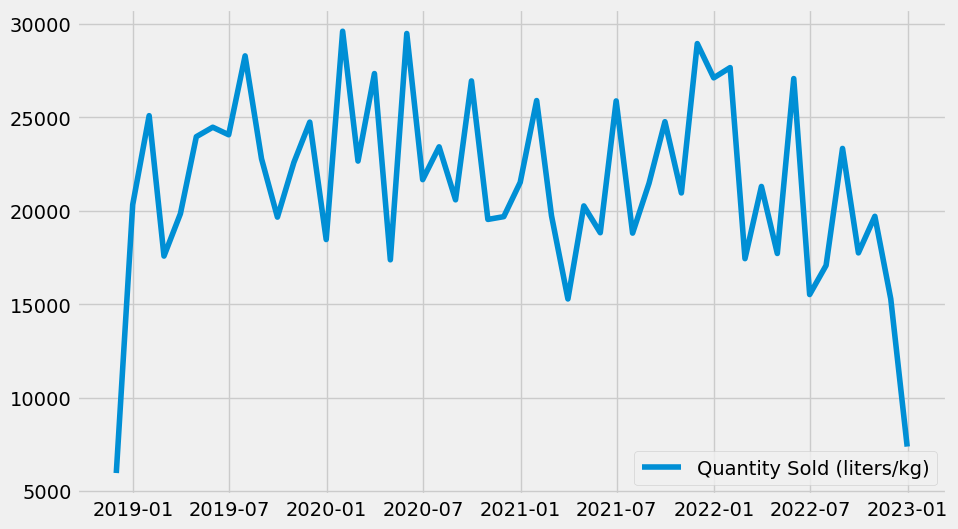

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Define the file path and load the dataset
file_path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/Prepared Data/dairy_wrangled.csv'  # Replace with your actual file path

# Load the dataset
df = pd.read_csv(file_path)

# Display the columns in the dataset to find the correct column name for the date
print(df.columns)

# Assuming the correct column name is 'Production Date' and 'Quantity Sold (liters/kg)'
# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Set 'Production Date' as the index
df.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
df_resampled = df.resample('M').sum()

# Define the ADF test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

# Apply the ADF test on the resampled data
adf_test(df_resampled['Quantity Sold (liters/kg)'])

# Plot the data to visually inspect for stationarity
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Quantity Sold (liters/kg)'], label='Quantity Sold (liters/kg)')
plt.legend()
plt.show()

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')
Dickey-Fuller Stationarity test:
Test Statistic                 -3.504628
p-value                         0.007869
Number of Lags Used             1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


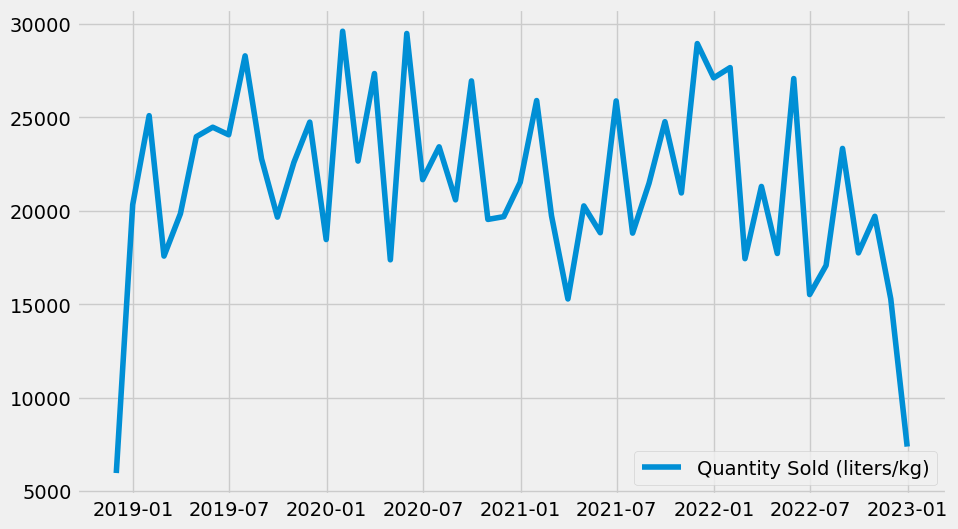

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Define the file path and load the dataset
file_path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/Prepared Data/dairy_wrangled.csv'  # Replace with your actual file path

# Load the dataset
df = pd.read_csv(file_path)

# Display the columns in the dataset to find the correct column name for the date
print(df.columns)

# Assuming the correct column name is 'Production Date' and 'Quantity Sold (liters/kg)'
# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Set 'Production Date' as the index
df.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
df_resampled = df.resample('M').sum()

# Define the Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test using the function on the resampled 'Quantity Sold (liters/kg)' time series
dickey_fuller(df_resampled['Quantity Sold (liters/kg)'])

# Plot the data to visually inspect for stationarity
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Quantity Sold (liters/kg)'], label='Quantity Sold (liters/kg)')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'KeralaUttar PradeshTelanganaChandigarhKarnatakaJharkhandBiharUttar PradeshBiharTelanganaHaryanaMadhya PradeshKarnatakaMaharashtraChandigarhChandigarhBiharDelhiDelhiWest BengalHaryana'

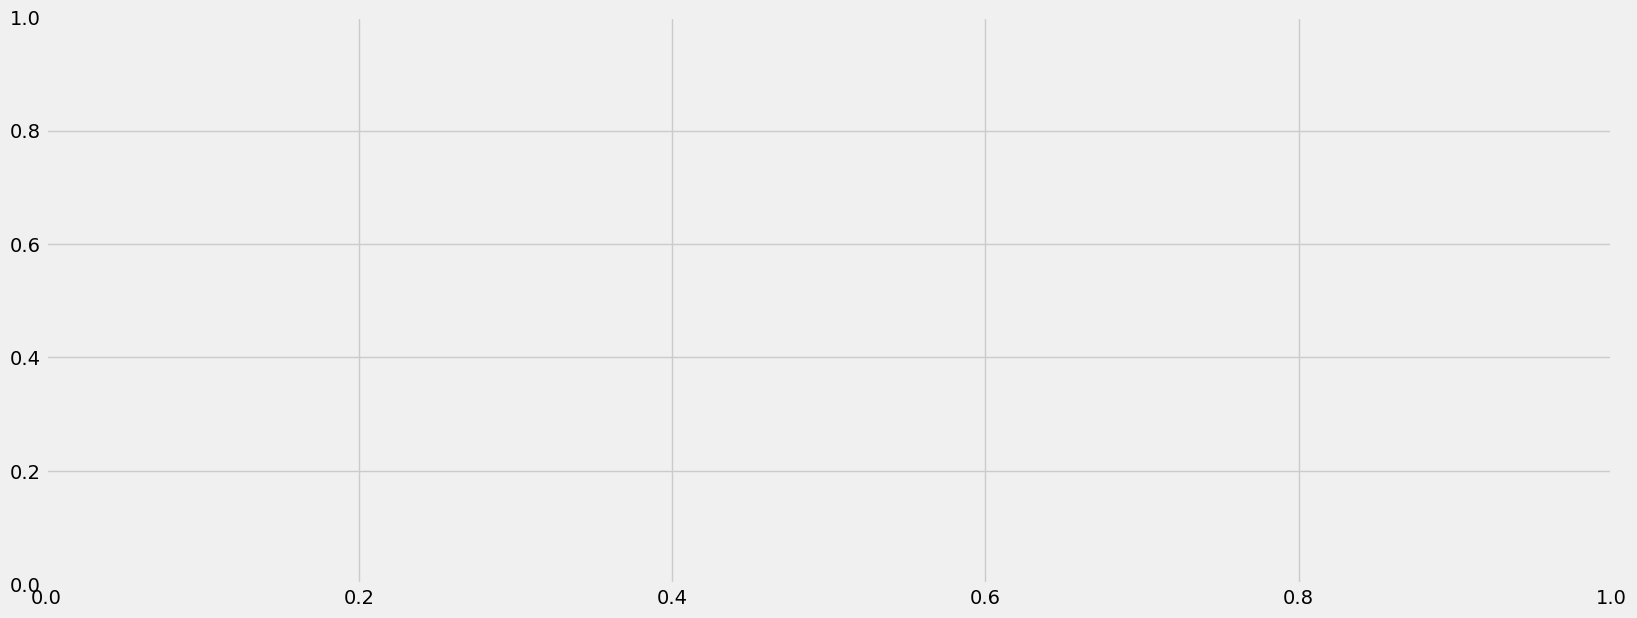

In [28]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_resampled)
plt.show()

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')
Dickey-Fuller Stationarity test:
Test Statistic                 -3.504628
p-value                         0.007869
Number of Lags Used             1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


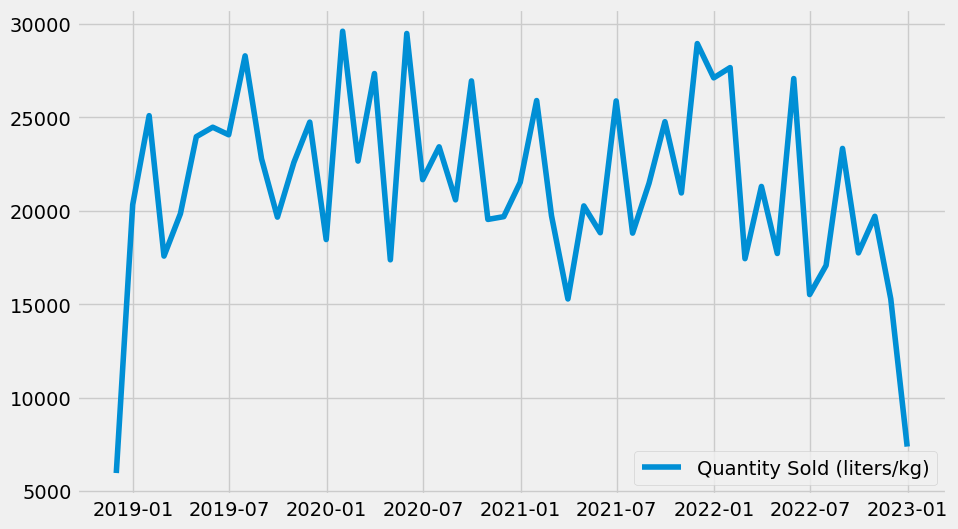

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 25.

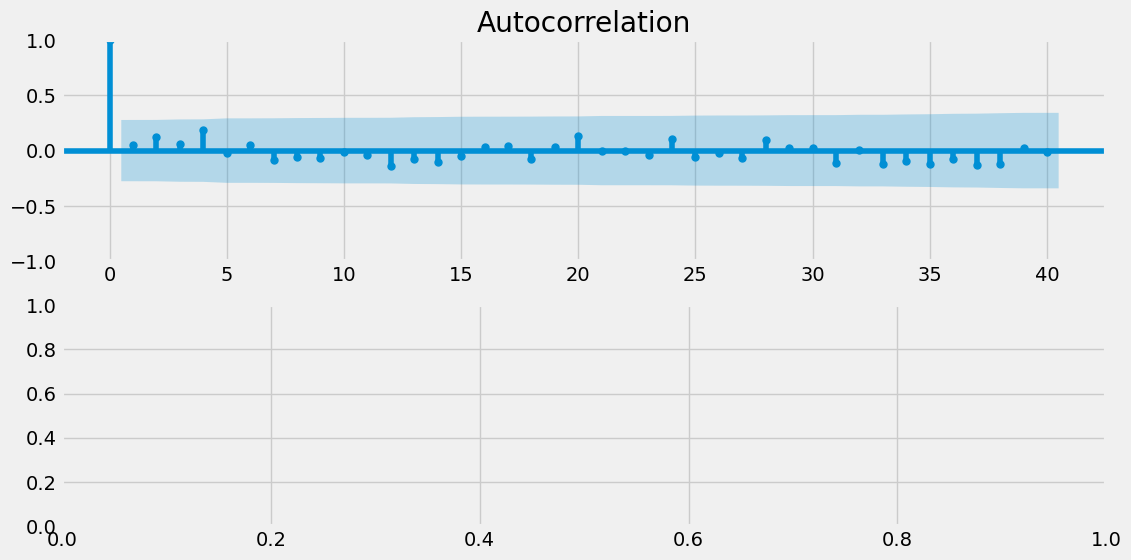

In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the file path and load the dataset
file_path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/Prepared Data/dairy_wrangled.csv'  # Replace with your actual file path

# Load the dataset
df = pd.read_csv(file_path)

# Display the columns in the dataset to find the correct column name for the date
print(df.columns)

# Assuming the correct column name is 'Production Date' and 'Quantity Sold (liters/kg)'
# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Set 'Production Date' as the index
df.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
df_resampled = df.resample('M').sum()

# Define the Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test using the function on the resampled 'Quantity Sold (liters/kg)' time series
dickey_fuller(df_resampled['Quantity Sold (liters/kg)'])

# Plot the data to visually inspect for stationarity
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Quantity Sold (liters/kg)'], label='Quantity Sold (liters/kg)')
plt.legend()
plt.show()

# Plot autocorrelation and partial autocorrelation
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_resampled['Quantity Sold (liters/kg)'], ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(df_resampled['Quantity Sold (liters/kg)'], ax=plt.gca(), lags=40)
plt.show()

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')
Dickey-Fuller Stationarity test:
Test Statistic                 -3.504628
p-value                         0.007869
Number of Lags Used             1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


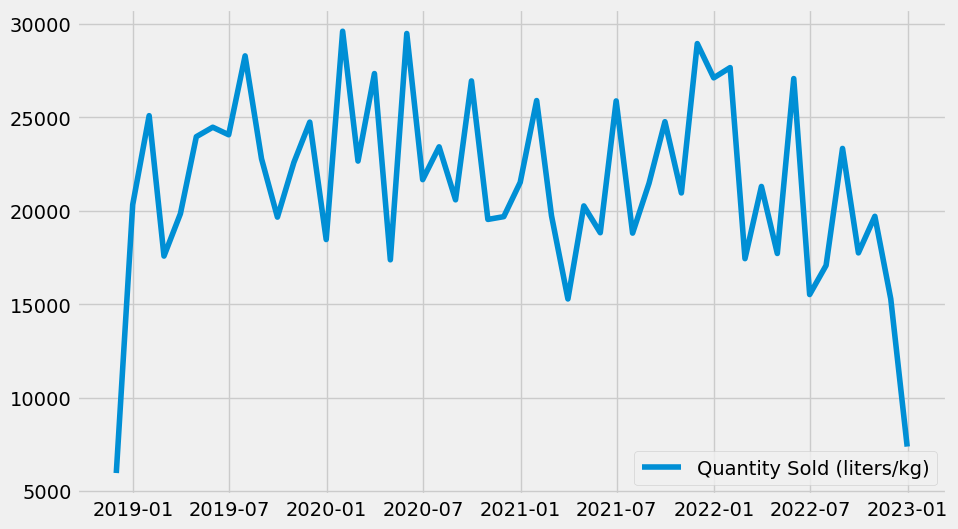

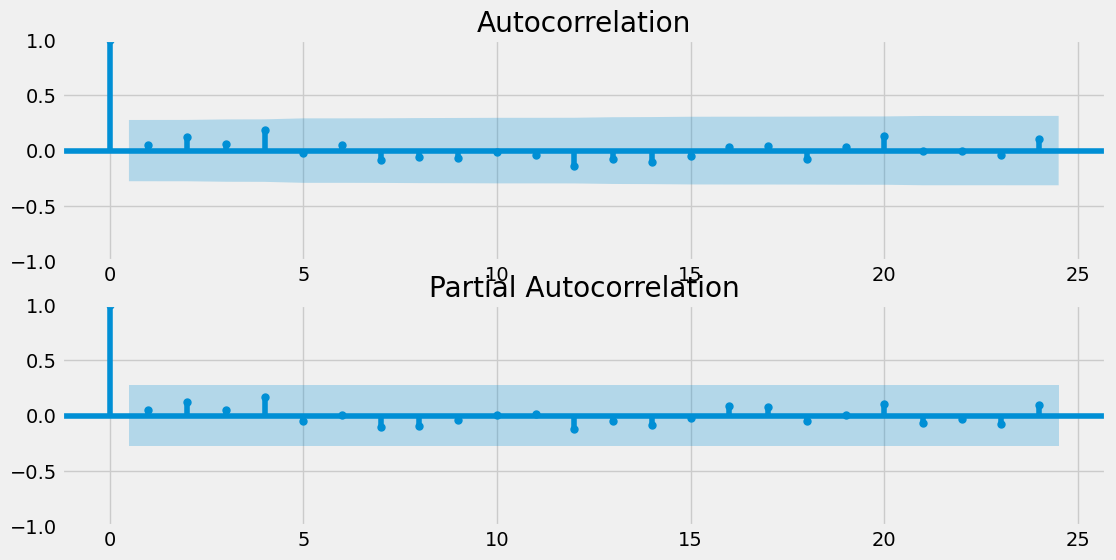

In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the file path and load the dataset
file_path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/Prepared Data/dairy_wrangled.csv'  # Replace with your actual file path

# Load the dataset
df = pd.read_csv(file_path)

# Display the columns in the dataset to find the correct column name for the date
print(df.columns)

# Assuming the correct column name is 'Production Date' and 'Quantity Sold (liters/kg)'
# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Set 'Production Date' as the index
df.set_index('Production Date', inplace=True)

# Resample the data to monthly frequency (or any other frequency as needed)
df_resampled = df.resample('M').sum()

# Define the Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test using the function on the resampled 'Quantity Sold (liters/kg)' time series
dickey_fuller(df_resampled['Quantity Sold (liters/kg)'])

# Plot the data to visually inspect for stationarity
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Quantity Sold (liters/kg)'], label='Quantity Sold (liters/kg)')
plt.legend()
plt.show()

# Calculate the maximum lags allowed (less than 50% of the sample size)
max_lags = len(df_resampled) // 2 - 1

# Plot autocorrelation and partial autocorrelation with adjusted lags
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_resampled['Quantity Sold (liters/kg)'], ax=plt.gca(), lags=max_lags)
plt.subplot(212)
plot_pacf(df_resampled['Quantity Sold (liters/kg)'], ax=plt.gca(), lags=max_lags)
plt.show()

p-value: .007, which is less than .05 so the test result is significant. 

Critical Value 1% vs Test Statistic: -3.574589 vs -3.504628. Test Stat is larger than Critical Value 1%. Cannot reject null hypothesis at 1%.

Critical Value 5% vs Test Statistic: -2.923954 vs -3.504628. Crtical Value 5% is larger than Test Stat. Can reject null hypothesis at 5%.

Critical Value 10% vs Test Statistic: -2.600039 vs -3.504628. Critival Value 10% is larger than Test Stat. Can reject null hypothesis at 10%. 

Data is stationary at 5% and 10% critical value. Autocorrelation support this evidence.